<a href="https://colab.research.google.com/github/MayukhDg/Beginner-/blob/main/NLP%20for%20beginners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk

In [ ]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


In [ ]:
messages= [line.rstrip() for line in open ('/content/drive/MyDrive/SMSSpamCollection')]

In [ ]:
print(len(messages))

In [ ]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
for mess_no, message in enumerate(messages[:10]):
  print(mess_no, message)
  print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
messages= pd.read_csv('/content/drive/MyDrive/SMSSpamCollection', sep='\t', names=['label', 'message'])

In [ ]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [ ]:
messages ['length']= messages['message'].apply(len)

In [ ]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(x='length', hue='label', bins=100, data=messages)

In [ ]:
messages['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8dae8c50d0>,
      dtype=object)

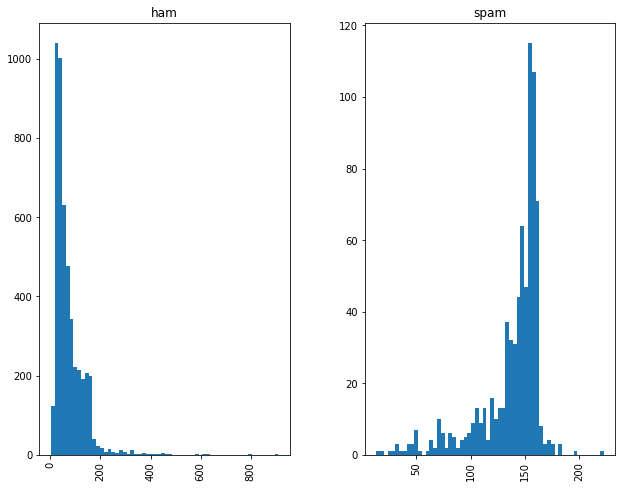

In [ ]:
messages.hist(column='length', by='label', bins=60, figsize=(10,8))

In [ ]:
import string

In [ ]:
from nltk.corpus import stopwords

In [ ]:
def text_process(mess):

  nopunc= [char for char in mess if char not in string.punctuation]

  nopunc= ''.join(nopunc)

  return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
messages ['message'].head(5). apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
bow_transformer= CountVectorizer(analyzer=text_process).fit(messages['message'])

In [ ]:
print(len(bow_transformer.vocabulary_))

11425


In [ ]:
mess4= messages['message'] [3]

In [ ]:
print(mess4)

U dun say so early hor... U c already then say...


In [ ]:
bow4= bow_transformer.transform([mess4])

In [ ]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [ ]:
print(bow4.shape)

(1, 11425)


In [ ]:
bow_transformer

In [ ]:
messages_bow= bow_transformer.transform(messages['message'])

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
tfidf_transformer= TfidfTransformer().fit(messages_bow)

In [ ]:
messages_tfidf= tfidf_transformer.transform(messages_bow)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
spam_detect_model= MultinomialNB().fit(messages_tfidf, messages['label'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
msg_train, msg_test, label_train, label_test= train_test_split(messages['message'], messages['label'], test_size=0.3)

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline= Pipeline([('bow', CountVectorizer(analyzer=text_process)), ('tfidf', TfidfTransformer()), ('classifier', MultinomialNB())])

In [ ]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f8dae423950>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])